# The Data 

Basic imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Importing the 'train.csv' file into a DataFrame:

In [20]:
data = pd.read_csv('input/train.csv', index_col=['PassengerId'])
data.index.names = ['PId']
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The complete description of the variables can be found either in the `'README.md'` file or on [Kaggle](https://www.kaggle.com/c/titanic/data).

In [21]:
data.shape

(891, 11)

We have 891 observations of 11 variables. Let's dive into them more carefully:

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Let's check for missing values:

In [23]:
#Checking for missing data
NAs = pd.concat([data.isnull().sum()], axis=1, keys=['Train'])
NAs[NAs.sum(axis=1) > 0]

,Train
Age,177
Cabin,687
Embarked,2


We see that `'Age'`, `'Cabin'` and `'Embarked'` are the only columns that have missing values with which we will have to deal.

## EDA 

### 1. Survived 

`'Survived'` is our **target array**. Plotting the target array will tell us whether our data is balanced or imbalanced.

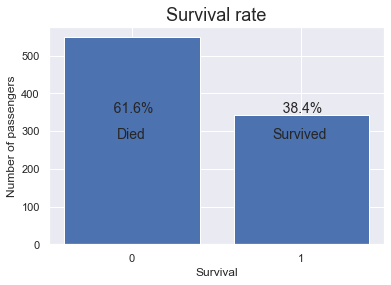

In [25]:
bins = [-0.4, 0.4, 0.6, 1.4]
plt.hist(data['Survived'], bins=bins)

plt.xticks([0, 1])
plt.xlabel('Survival')
plt.ylabel('Number of passengers')
plt.title('Survival rate', size=18)
plt.text(-0.18, 350, str(format(data['Survived'].value_counts(normalize=True)[0]*100,'7.1f')) + '% ', size=14)
plt.text(-0.09, 280, 'Died', size=14);

plt.text(0.82, 350, str(format(data['Survived'].value_counts(normalize=True)[1]*100,'7.1f')) + '% ', size=14);
plt.text(0.83, 280, 'Survived', size=14);

Here we see that our data is skewed, so we will probably need to perform some preprocessing to boost the performance of our machine learning model.

### 2. Pclass

As mentioned above, this is a categorical feature. Hence, we will change its entries into strings when feature engineering the  data.

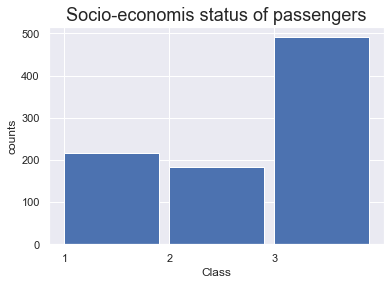

In [26]:
plt.hist(data['Pclass'], bins=[1, 1.9, 2, 2.9, 3, 3.9])
plt.xticks([1,2,3])
plt.xlabel('Class')
plt.ylabel('counts')
plt.title('Socio-economis status of passengers', size=18);

In [27]:
suffix = ['st', 'nd', 'rd']
for i in [1,2,3]:
    print(str(format(data['Pclass'].value_counts(normalize=True)[i]*100,'1.1f')) 
      +'% of passengers travelled in {0}'.format(i) + suffix[i-1] + ' class.')

24.2% of passengers travelled in 1st class.
20.7% of passengers travelled in 2nd class.
55.1% of passengers travelled in 3rd class.


### 3. Name 

In [38]:
data['Name'].describe()

count                              891
unique                             891
top       Jacobsohn, Mr. Sidney Samuel
freq                                 1
Name: Name, dtype: object

Since all the entries of the `'Name'` column are unique, some preprocessing is needed in order to extract interesting information from it.

For simplicity, I will drop this column for my first analysis.

### 4. Sex 

In [30]:
print(str(format(data['Sex'].value_counts(normalize=True)['male']*100,'1.1f')) 
      +'% of passengers were males')
print(str(format(data['Sex'].value_counts(normalize=True)['female']*100,'1.1f')) 
      +'% of passengers were females')

64.8% of passengers were males
35.2% of passengers were females


### 5. Age 

In [32]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

As highlighted above, 177 entries are missing (20% of the data). Therefore, when feature engineering, we will have to use some simple **imputation approach**, such as substituting the missing values with the mean value.

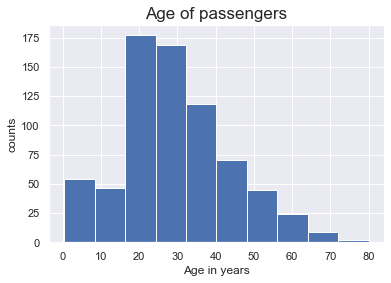

In [34]:
plt.hist(data['Age'])
plt.xlabel('Age in years')
plt.ylabel('counts')
plt.title('Age of passengers', size=17);

### 6. SibSp 

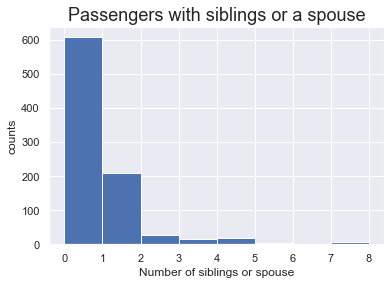

In [35]:
plt.hist(data['SibSp'],bins=8)
plt.xlabel('Number of siblings or spouse')
plt.ylabel('counts')
plt.title('Passengers with siblings or a spouse', size=18);

### 7. Parch 

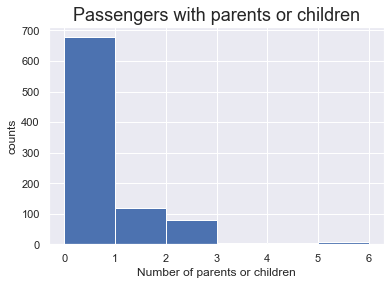

In [36]:
plt.hist(data['Parch'], bins=6)
plt.xlabel('Number of parents or children')
plt.ylabel('counts')
plt.title('Passengers with parents or children', size=18);

### 8. Ticket 

In [37]:
data['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

Due to the high number of unique entries, the `'Ticket'` column also requires some preprocessing in order to extract interesting information from it.

For simplicity, I will drop this column for my first analysis.

### 9. Fare 

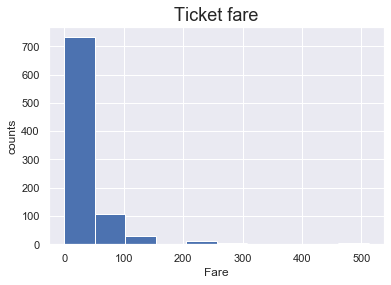

In [39]:
plt.hist(data['Fare'], bins=10)
plt.xlabel('Fare')
plt.ylabel('counts')
plt.title('Ticket fare', size=18);

### 10. Cabin 

In [40]:
data['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

Most of the `'Cabin'` entries are missing values (77%). I will drop this column in future analysis.

### 11. Embarked 

As mentioned before, 2 of the `'Embarked'` entries are missing. I will then use some simple **imputation approach**, such as substituting the missing values with the mode value (the most frequent value).

In [43]:
ports = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
for i, entry in enumerate(data['Embarked'].dropna().unique()):
        print(str(format(data['Embarked'].value_counts(normalize=True)[entry]*100,'1.1f')) 
              + '% of passengers embarked in ' + ports[entry] + '.')

72.4% of passengers embarked in Southampton.
18.9% of passengers embarked in Cherbourg.
8.7% of passengers embarked in Queenstown.


## Summary 

- the **target array** (`data['Survived']`) is skewed. 
    In a second analysis I will use preprocessing methods such as Oversampling, SMOTE and Undersampling of the dataset;
- I will change the entries of the **`'Pclass'`** column into strings, as it is a **categorical feature**.
- I will **drop** the features that need too much preprocessing or have a lot of missing data, such as **`'Name'`, `'Ticket'` and `'Cabin'`**;
- I will **fill the missing values** of **`'Age'`** using the mean, and the missing values of **`'Embarked'`** using the mode;
- I will **encode the categorical features**.